# Developing a Neural Network From Scratch

## Linear and Logistic Regression

### The NumPy library

Develing a Neural Network ultimately boils down to linear algebra. Therefore as a result I need a data structure which models matrices. This is where the library NumPy comes in. NumPy is a library which contains a data structure called a Numpy Array. This is essentially a matrix and we will use this to model the Neural Network.

In [313]:
import numpy as np  

### The Hypothesis Function

The hypothesis function is simply a function in which we input our X matrix and a theta matrix in order to gain the 'hypothesis'. This is what we believe the value of Y will be. 

#### Calculating the Hypothesis in Logistic Regression

Remember that logistic regression is essentially determining the class that X belongs to. The output can only be a discrete output. Therefore for the logistic hypothesis we need to transform it to a value between 0 and 1. This is where the sigmoid function comes in.

![The sigmoid function](https://miro.medium.com/max/1280/1*sOtpVYq2Msjxz51XMn1QSA.png)

If the value of the sigmoid function is above 0.5 we say that X belongs to the positive class if the output is less than 0.5 we say that X belongs to the negative class.

#### Calculating the Hypothesis In Linear Regression

This is a much more familiar type of hypothesis. In fact most people reading this will have already implemented this without even releasing it. If you have ever drawn a line of best fit in Mathematics you have implemented lineaer regression. To calculate the hypothesis will simply multiply the matrix X by the matrix theta.

In [314]:
def hypothesis(theta, X, logistic=False):
    """Calculate the hypothesis for both logistic and linear regression"""
    if logistic:
        return 1/(1 + np.exp(-np.matmul(X, theta)))
    else:
        return np.matmul(X, theta)
        

### The Cost Function

Now that I have identified what the hypothesis means for both linear and logistic regression I will now talk about the cost function. The cost function is a function that allows us to measure how well our model fits the data provided.

For linear regression this involves measuring the difference between the hypothesis for a given X and the actual Y value for that X. In linear regression one way of computing this is by calculating the mean square distance of the hypothesis and the Y values. The cost function for Linear Regression is as follows:

![The Cost Function For Linear Regression](https://lh3.googleusercontent.com/proxy/u3kKnWFubERMPyDVfE3gKAc9NTXBpmkRj49VgOS5JsL1EbnHEoIrXV96UeS0PW2-M4ei-PC8UdHltNIPE3PZNtdd8yPLJB8rxC4H0ymorCnc9C00AZJtQA)


For logistic regression this involves something a bit more complicated. If y = 1 the cost of one data point is the negative logarithm of the hypothesis. If y = 0 is the negative logarithm of one minus the hypothesis. Putting this together means the cost function for Logistic Regression is as follows:

![The Cost Funcction For Logistic Regression](https://i.stack.imgur.com/XbU4S.png)


In [315]:
def cost_function(X, Y, theta, learning_rate, regularization, logistic):
    """Calculates the cost and new theta for the given parameters.
    Calculates the cost function for both logistic and linear regression.
    The Function also performs one iteration of gradient descent."""
    
    # Make a prediction using the given X and theta.
    prediction = hypothesis(theta, X, logistic)

    # Get the number of labelled data.
    m = X.shape[0]

    # Calculate the difference between the prediction matrix and the Y matrix.
    difference = prediction - Y       

    ##### Calculate the next theta using gradient descent.
    sigma = np.dot((difference)[:,0], X).reshape((-1,1))

    theta_0 = theta[0:1, :] - ((learning_rate / m) * sigma[0:1, :])
    theta_rest = theta[1:, :] * \
                    (1 - (learning_rate * regularization / m)) - ((learning_rate / m) * sigma[1:,:])
    
    # We do not choose the first feature.
    square_theta = theta[1:, :] * theta[1:, :]
    square_theta = np.sum(square_theta, axis=0)
    
    # If we are not using a logistic model then we sum the square difference.
    if not logistic:          
        # Calculate the cost using the linear function.
        square_difference = difference * difference
        sigma = square_difference.sum()
        cost = (1/(2*m)) * (sigma + regularization * square_theta)
        
    else:
        # Calculate the cost using the logistic function.
        log_hypoth = np.log(prediction)
        sigma = (Y * log_hypoth + (1-Y) * np.log(1 - prediction)).sum()
        cost = - (((1/m) * (sigma)) + (regularization/(2*m)) * square_theta)      

    # Return the cost of the model and the new theta we have calculated.
    return cost, np.insert(theta_rest, 0, theta_0, axis=0)


### Gradient Descent

If you read the above code you may be a little confused. I have only talked about updating theta. If so you have been paying attention to this post. The above method is a convenience method and is never called directly. The program outputs the cost and it additionally outputs a new value of theta based on the derivative of the cost. The two are interlinked so I calculate them at the same time under one function.

Gradient descent in Mathematics is an algorithm to find a minima numerically. The algorithm is defined as follows:

![The Gradient Descent Algorithm](https://hackernoon.com/hn-images/0*8yzvd7QZLn5T1XWg.jpg)

We repeat gradient descent until theta stops updating. This in reality would take years so we declare a value in which if the difference between the previous theta value and the current theta value is less than this value then we stop converging.

Alpha in the algorithm represents the learning rate. This is how far we go down the tangent of the derivative. If it is too small then gradient descent takes forever, if this is too large then gradient descent will diverge. We need to careful when implementing gradient descent as we may converge to a local minima and not a global minima.


In [329]:
def gradient_descent(X, Y, learning_rate=0.01, max_iters=1000, regularization=0.1, logistic=False):
    """Returns the optimum theta using gradient descent.
       Remember that you may need to Optimizaton    algorithms.
       We use regularization"""
    
    
    # Number of training examples.
    m = X.shape[0]

    # When true we stop calculating the value of theta.
    done = False
    
    # We declare convergence if J(theta) decreases by less than below.
    convergence = 10 ** -3
    
    # Assign theta to be a value of 0s initially.
    theta = np.array([0 for x in range(X.shape[1] + 1)], dtype='float')
    theta = np.reshape(theta, (-1,1))    
    
    # Need to add ones to X
    ones = np.ones((1,m))
    
    # Append the columns of ones to x. This represents the bias.
    X = np.insert(X, 0, ones, axis=1)        
    
    # Perform gradient descent.
    for i in range(max_iters):
        
        # Output if the maximum number of iterations has been reached.
        if i == max_iters - 1:
            print("The maximum number of iterations has been reached!")
        
        prev_theta = theta
    
        # Update the cost and theta.
        cost, theta = cost_function(X, Y, theta, learning_rate, regularization, logistic)
    
        # Stop the gradient descent algorithm if we have converged.
        if abs((theta - prev_theta).max(axis=0)) < convergence:
            print("Converged!")
            break            
        
    return X, theta

### Overfitting and Underfitting

Sometimes when we carry out gradient descent in order to obtain a value of theta which models our data the model may not be as accurate as it can be. This is due to two reasons overfitting and underfitting.

Underfitting is when our computed model does not fit our data and leads to inaccuracy in the training and testing examples. When this happens we may need to add more features to gain insight into the data, change or model or implement feature scaling.

Overfittting is when our computed model fits our training examples so will it does not generalise to our testing examples. To overcome this we use regularization.

#### Regularization

Regularization adds an additional penalty to ensure coefficients do not take exterme values. We do not perform regularization on the bias.

### The Decision Boundary

I have told you what logistic regression is but not how to convert the hypothesis into a given class. We say the hypothesis belongs to the positive class if the value is greater than 0.5 and we say the hypothesis belongs to the negative class is the value is less than 0.5.

The set of values in which the hypothesis computed is exactly 0.5 is called the decision boundary.

![The decision boundaries](https://miro.medium.com/max/1012/1*i_oYgWjPbXbg3Z2uQLAmtw.png)


In [330]:
def predict_class(prob):
    """Converts the hypothesis from a probability to a class."""
    return np.where(prob > 0.5, 1, 0)

### Feature Scaling

Machine Learning algorithms work best when each feature is on a similar scale. If features are not in a similar scale it may result in underfitting of the data. 

One way of scaling features is to transform the data so that the data has a mean of 0 and a standard deviation of 1. If you have taken A-Level mathematics you will probably be familiar with this. To do this we calculate the mean of each feature and subtract each element by this mean. We then divide this by the standard deviation of that feature.

In [331]:
def feature_scaling(X):
    """Uses mean normalization to scale the input."""
    
    # Calculate the mean of each feature.
    X_mean = np.mean(X, axis=0).reshape((-1,1))
    X_std = np.std(X, axis=0).reshape((-1,1))

    # If the standard deviation is 0 then we encounter problems.
    if X_std.min(axis=0)[0] == 0:
        return None
    
    return (X - X_mean.T) / X_std.T 

### Multiclass Classification (One-vs-All)

So far I have talked about only how we can determine if something belongs to the positive class and if something belongs to the negative class. I as of yet have not talked about how to predict an outcome if there is more than one class. The technique I have implemented to carry this out is One-vs-All logistic classificaiton.

In this method we iterate over each class and we carry out logistic classification as normal taking that class as the positive class and every other class as the negative class. If the probability of the X input being in that class is greater than the currently highest probability of it being in another class, we update the class in which X belongs to.

![one-vs-all classification](https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png)

In [337]:
def logistic_classification_multi(X, Y, learning_rate=0.01, regularization=0.01, max_iters=1000):
    """Performs logistic regression multiclass classification"""
    # We need to find the classes in Y
    classes = np.unique(Y.flatten())
    
    # Iterate over the classes. Find the class with the highest probabiity.
    # We predict that class as the class that we are going to use for predictions.

    # Probabilities of each class.
    probabilities = [[0,0] for i in range(Y.shape[0])]
    
    # List of the thetas we have learnt.
    thetas = []

    for i in range(classes.shape[0]):
        # Choose close i as the positive class and the others as the negative class.
        Y_temp = np.where(Y == i, 1, 0)
        
        X_temp, theta_temp = gradient_descent(X, Y_temp, learning_rate=learning_rate, 
                                              logistic=True, max_iters=max_iters, regularization=regularization)
        probs = hypothesis(theta_temp, X_temp, True)
        temp_classes = predict_class(probs)
        
        # Append theta to the list of thetas for each class.
        theta_temp.append(theta_temp)
        
                
        for j in range(len(probabilities)):
            if probs[j, 0] > probabilities[j][0]:
                probabilities[j] = [probs[j, 0], i]
                
    return thetas, probabilities

In [338]:
def logistic_classification(X, Y, learning_rate=0.01, regularization=0.01, max_iters=1000):
    """This method is called by the user to generate theta."""
    X, theta = gradient_descent(X, Y, learning_rate=learning_rate, logistic=True, max_iters=max_iters, 
                               regularization=regularization)
    probs = hypothesis(theta, X)
    return theta

### Neural Networks

Now we have got to the exciting part. The part which most people came to this page wanting to know. I am talking about Neural Networks. In particular I am talking about the feedforward neural network. The bad news is that as with anything exciting it is incredibly hard to implement. But nevertheless I have a working implementation. First of all I will let you digest the cost function:

![neural_networks_cost_function](https://i.stack.imgur.com/PYhrJ.png)

It looks like a difficult formula but it is not too hard. In essense if we ignore paramatization we are calculating the sum of the costs for every node in the layer once we have done this we have found the cost of the model using one data sample. We then repeat this for as every data samples we have and divide by the number of samples.

#### Feed Forward

In the feed forward phase of the neural network we simply add a bias unit to each layer. Use a list of thetas to calculate the theta for each layer, we then apply the activation function (we're using sigmoid) for each node in that layer and so on until we get to the final layer which is our hypothesis.

#### Back Propagation

Back propagation is how we adjust the matrices of theta. In essense we calculate the error of the hypothesis and back propagate the error for each layer excluding the first. 

I know I haven't explained neural networks as detailed as I could have but it is an incredibly complicated algorithm and hard to explain abstractly. If anyone wants me to explain it in detail I would be happy to help.

#### Structure of a Neural Network

![structure_of_neuralnetworks](https://uc-r.github.io/public/images/analytics/deep_learning/deep_nn.png)

In a neural network each layer contains a bias unit which is the first node. This is equal to 1 for all nodes. We add our data to the first layer. Between the first layer and the output layer we have the nodes called the hidden nodes. These determine the complexity of what the neural network can learn. It is important to select the number of nodes in each layer carefully to avoid overfitting and underfitting.

Neural Networks can make complicated inferences about data which linear and logistic regression simply cannot.

![neural_network_decision_boundary](https://i.stack.imgur.com/8oi2L.png)




In [340]:
class NeuralNetwork:

    def __init__(self, X, Y, num_features, *layers):
        """Sets up the hideen layers in the network and the inital values of theta."""

        self.number_of_layers = len(layers) + 1
        self.size_of_layers = list(layers)
        self.size_of_layers.insert(0, num_features)

        self.theta = []
        self.nodes = []

        self.num_features = num_features

        self.X = X
        self.Y = Y

        self.regularization = 0.001
        self.learning_rate = 0.01

        self.max_iters = 1000

    def sigmoid_activation(self, np_array):
        """Apply sigmoid activation on the given layer."""

        # Need to prevent overflow error.
        signal = np.clip(np_array, -500, 500)

        return 1 / (1 + np.exp(-signal))

    def forward_propagation(self, X_inp):
        """Calcules the hypothesis via feed forward propagation."""

        # Insert the X_input into X
        self.nodes[0][1:, :] = X_inp

        for i in range(len(self.theta)):
            if i < len(self.theta) - 1:
                self.nodes[i + 1][1:, :] = np.matmul(self.theta[i], self.nodes[i])
                self.nodes[i + 1][1:, :] = self.sigmoid_activation(self.nodes[i + 1][1:, :])
            else:
                self.nodes[i + 1] = np.matmul(self.theta[i], self.nodes[i])
                self.nodes[i + 1] = self.sigmoid_activation(self.nodes[i + 1])

        return self.nodes[-1]

    def backward_propagation(self, hypothesis, Y_test, accumulator):
        """Perform backwards propagation which is used to trin the neural network."""

        # Going to do backwards propagation again.
        last_error = hypothesis - Y_test.reshape((-1, 1))

        # Create a list of the errors.
        errors = [np.zeros((self.nodes[i].shape)) for i in range(1, len(self.nodes) - 1)]
        errors.append(last_error)

        # Now we need to actually perform the backwards propagation.
        for i in reversed(range(1, len(self.nodes) - 1)):
            # No bias unit on the final layer.
            if i == len(self.nodes) - 2:
                temp_error = np.matmul(self.theta[i].T, errors[i])
            else:
                temp_error = np.matmul(self.theta[i].T, errors[i][1:, :])

            errors[i - 1] = temp_error * (self.nodes[i] * (1 - self.nodes[i]))

        # Now we have a list of all the errors.
        for i in range(len(accumulator)):
            if i == len(accumulator) - 1:
                accumulator[i] = accumulator[i] + np.matmul(errors[i], self.nodes[i].T)
            else:
                accumulator[i] = accumulator[i] + np.matmul(errors[i][1:, :], self.nodes[i].T)

        return accumulator

    def gradient_descent(self, delt):
        """This method performs gradient descent using the given delt."""

        max_descent = 0
        prev_theta = self.theta

        for i in range(len(delt)):
            self.theta[i] = self.theta[i] - self.learning_rate * delt[i]
            difference = prev_theta[i] - self.theta[i]

            # Get the maximum
            if np.max(difference) > max_descent:
                max_descent = np.max(difference)

        # if max_descent < 10 ** -4:
        #   print("Converged!")
        #  return True

        return False

    def predict(self, X):
        predictions = self.forward_propagation(X)

        # Get the largest prediction

        return predictions

    def train_neural_network(self, X, Y):
        """Trains the neural network model.
        Layers passed in contains two keys,
        number of layers and array containing
        the size of each layer."""

        # Now we need to instantiate the layers.
        # We need to use random initialization this time.
        # Zero initialization will not work.

        # We're going to find epsilon for random initialisation
        epsilon = 0.5

        self.theta = []
        self.nodes = []  # We're also creating the hidden node matrices.

        # Append the X input nodes into the activation nodes.
        self.nodes.append(np.array([0 for i in range(self.num_features)], dtype='float').reshape((-1, 1)))
        # We are using a list and not a 2 dimensional matrix as a two dimensional
        # so that we can store different number of nodes in different layers.
        self.nodes[0] = np.insert(self.nodes[0], 0, 1).reshape((-1, 1))

        for i in range(self.number_of_layers - 1):
            self.theta.append(np.random.rand(self.size_of_layers[i + 1],
                                             self.size_of_layers[i] + 1) * (2 * epsilon) - (epsilon))
            self.nodes.append(np.zeros(self.size_of_layers[i + 1]))

            if i != self.number_of_layers - 2:
                self.nodes[i + 1] = np.insert(self.nodes[i + 1], 0, 1).reshape((-1, 1))
                # Do not want to insert a 1 in the last layer
            else:
                self.nodes[i + 1] = self.nodes[i + 1].reshape((-1, 1))

        # We need an accumulator.
        accumulator = [np.zeros((self.theta[i].shape[0], self.theta[i].shape[1])) \
                       for i in range(len(self.theta))]

        # Now we need to perform forward propagation.
        # Perform backward propagatio on all the examples.
        for j in range(self.max_iters):
            for i in range(X.shape[0]):
                hypothesis = self.forward_propagation(X[i, :].reshape((-1, 1)))
                accumulator = self.backward_propagation(hypothesis, Y[i, :], accumulator)

            m = X.shape[0]

            delt = [(1 / m) * accumulator[i] for i in range(len(self.theta))]

            # Add regularization. We do not regularize the bias term.
            for i in range(len(delt)):
                delt[i][:, 1:] = delt[i][:, 1:] + (self.regularization / m) * self.theta[i][:, 1:]

            done = self.gradient_descent(delt)

            if j == self.max_iters - 1:
                print("The maximum number of iterations has been reached!")

            if done:
                print("Converged!")
                break



(784, 1)
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

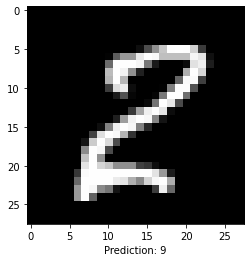

In [367]:
from mnist import MNIST
import numpy as np
import random
import NeuralNet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mndata = MNIST('samples')

images, labels = mndata.load_training()

mntesting = MNIST('testing')

image_test, image_label = mntesting.load_testing()

# nn = NeuralNet(images, labels, images.shape[1], 100, 100, labels.shape[1])

# nn.train_neural_network(images, labels)

np_testing_X = np.array([images[i] for i in range(len(images))])
np_testing_Y = np.zeros((len(image_label), 10))

for i in range(np_testing_Y.shape[0]):
    index = image_label[i]
    np_testing_Y[i, index] = 1

X_train, X_test, y_train, y_test = train_test_split(np_testing_X[:5000, :], np_testing_Y[:5000, :], random_state=69)

nn = NeuralNet.NeuralNetwork(X_train, y_train, np_testing_X.shape[1], 800, np_testing_Y.shape[1])

# nn.train_neural_network(X_test, y_test)

# Just gonna save the theta in a file.
# nn.save_theta()

nn.load_theta("theta0.csv", "theta1.csv")


# Pick a random index.

index = random.randrange(0, len(X_train))

plt.imshow(X_train[index].reshape((28,28)), cmap='gray')

prediction = nn.predict(X_train[index].reshape((-1,1)))
prediction = np.argmax(prediction)


plt.xlabel("Prediction: " + str(prediction))
plt.show()



## The End

Thank you for putting up with me in this post. Have a good one.

![san_miguel](miguel.jpg)